In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

# Identifying which Holiday brings in the Most Revenue 

This project is broken into 5 steps: 
1. [Problem Definition](#problem_definition)
2. [Gathering Data / Information](#get_data)
3. [Data Cleaning / Imputation](#clean)
4. [Exploratory Analysis](#explore)
6. [Interpret Results](#interpret)

# 1. Problem definition <a id='problem_definition'></a>

This is a practice case from [here](https://www.youtube.com/watch?v=WskJOx_ZQys&t=15s).   
Holiday info: [here](https://www.kaggle.com/datasets/donnetew/us-holiday-dates-2004-2021)  
Order info: [here](https://raw.githubusercontent.com/Gaelim/google-data-stuido/main/Ecommerce_Data.csv)  


**GOAL**: Identify which holiday brings in the most money.  
Outcome: Adjust marketing dollars. 

**OUTCOMEs**: 
- Thanksgiving Eve brings in the largest dollar amount in orders. 
- Thanksgiving Eve has the highest order count. 
- 4th of July and Valentines day have the highest mean order values 

# 2. Gathering Data / Information <a id='get_data'></a>

In [36]:
df = pd.read_csv('/Users/jackiekinsler/projects/data_analysis_skeleton/practice_1/practice_1.csv', sep=",")
holiday = pd.read_csv('/Users/jackiekinsler/projects/data_analysis_skeleton/practice_1/US_Holiday_Dates_2004-2021.csv', sep=",")

### Clean the Holiday Data

In [37]:
holiday.head()

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008


In [38]:
holiday.drop(columns=['Month', 'Day', 'Year'], inplace=True)
holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     342 non-null    object
 1   Holiday  342 non-null    object
 2   WeekDay  342 non-null    object
dtypes: object(3)
memory usage: 8.1+ KB


In [39]:
# Make the date column into a datetime
holiday["Date"] = pd.to_datetime(holiday["Date"])

In [40]:
holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     342 non-null    datetime64[ns]
 1   Holiday  342 non-null    object        
 2   WeekDay  342 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 8.1+ KB


In [41]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Hour
0,574477,22591,CARDHOLDER GINGHAM CHRISTMAS TREE,1,3.25,15453,United Kingdom,11/4/11,12
1,570275,23541,WALL ART CLASSIC PUDDINGS,12,7.45,13098,United Kingdom,10/10/11,10


In [42]:
df.shape

(81601, 9)

81601 rows, 10 columns. 

In [43]:
df.describe()

,Quantity,UnitPrice,CustomerID,Hour
count,81601.000000,81601.000000,81601.000000,81601.000000
mean,11.965736,3.168721,15283.816215,12.729783
std,45.782018,18.731668,1713.292081,2.288777
min,-3114.000000,0.000000,12347.000000,6.000000
25%,2.000000,1.250000,13949.000000,11.000000
50%,5.000000,1.950000,15144.000000,13.000000
75%,12.000000,3.750000,16790.000000,14.000000
max,3186.000000,4287.630000,18287.000000,20.000000


From the above descriptive statistics, it is determined: 
- There must be an outlier in the quantity field, as the min is -3114 (negative quantity doesn't make sense) 

In [44]:
df.CustomerID.value_counts()

17841    1596
14911    1195
14096    1021
12748     957
14606     560
         ... 
17382       1
15516       1
13513       1
15180       1
12522       1
Name: CustomerID, Length: 4111, dtype: int64

From above, it is determined there are 4111 unique customers. 

# 3. Data Cleaning / Imputation <a id='clean'></a>


**Data cleaning** 
Check for:
- X Duplicates `df.duplicated()`
- X Data types `df.info()`
- X Meaningful column names 
- X Outliers 

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81601 entries, 0 to 81600
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    81601 non-null  object 
 1   StockCode    81601 non-null  object 
 2   Description  81601 non-null  object 
 3   Quantity     81601 non-null  int64  
 4   UnitPrice    81601 non-null  float64
 5   CustomerID   81601 non-null  int64  
 6   Country      81601 non-null  object 
 7   Date         81601 non-null  object 
 8   Hour         81601 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 5.6+ MB


From above, it is determined there are no `null` values in any of the columns.

For datatypes: 
- `InvoiceNo`, `StockCode`, `Description` and `Country` should be `string`
- `Date` should be a `datetime`
- `Quantity`, `UnitPrice`, `Hour`, and `CustomerID` have appropriate datatypes 

In [46]:
df["Date"] = pd.to_datetime(df["Date"])
df["Description"] = df["Description"].astype("string")
df["Country"] = df["Country"].astype("string")
df["InvoiceNo"] = df["InvoiceNo"].astype("string")
df["StockCode"] = df["StockCode"].astype("string")

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81601 entries, 0 to 81600
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    81601 non-null  string        
 1   StockCode    81601 non-null  string        
 2   Description  81601 non-null  string        
 3   Quantity     81601 non-null  int64         
 4   UnitPrice    81601 non-null  float64       
 5   CustomerID   81601 non-null  int64         
 6   Country      81601 non-null  string        
 7   Date         81601 non-null  datetime64[ns]
 8   Hour         81601 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), string(4)
memory usage: 5.6 MB


Looks good!

Now, check for duplicates. 

In [48]:
duplicateRows = df[df.duplicated()]

It appears there are no duplicates in this dataframe. 

Now, graphically check for outliers: 

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81601 entries, 0 to 81600
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    81601 non-null  string        
 1   StockCode    81601 non-null  string        
 2   Description  81601 non-null  string        
 3   Quantity     81601 non-null  int64         
 4   UnitPrice    81601 non-null  float64       
 5   CustomerID   81601 non-null  int64         
 6   Country      81601 non-null  string        
 7   Date         81601 non-null  datetime64[ns]
 8   Hour         81601 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), string(4)
memory usage: 5.6 MB


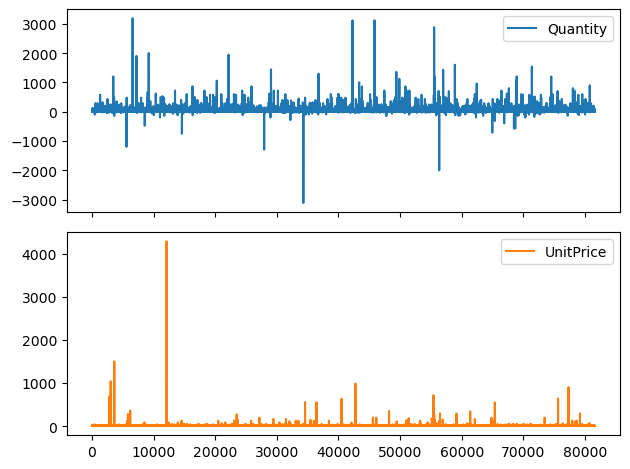

In [50]:
df[['Quantity','UnitPrice']].plot(subplots=True)

plt.tight_layout()
plt.show()

It appears there are some issues: 
- Neither quantity not unit price should be negative. 
- The outlier unit price at nearly $4000 should be investigated 

In [51]:
df.loc[df['UnitPrice'] > 4000]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Hour
12104,C560372,M,Manual,-1,4287.63,17448,United Kingdom,2011-07-18,12


There are 90 rows with the description "Manual", with a mean price of $92. 

Therefore, it is determined the "Manual" priced $4287.63 is an outlier that should be removed (index value 12104).

In [52]:
# Drop row at index 12104
df.drop([12104], inplace=True)

In [53]:
# Drop any values where the Quantity is negative. 
index_neg = df[ (df['Quantity'] < 0)].index
df.drop(index_neg , inplace=True)

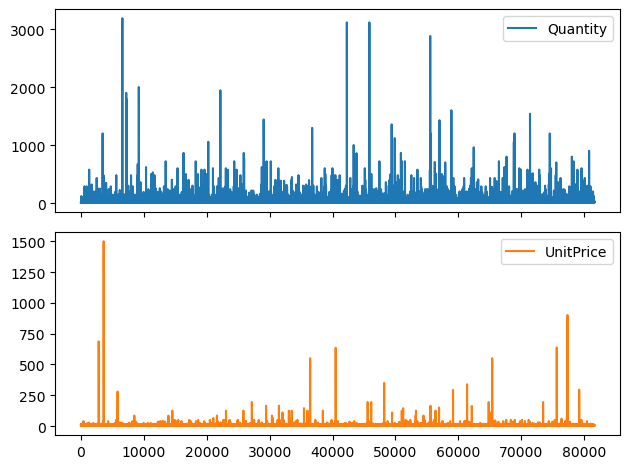

In [54]:
df[['Quantity','UnitPrice']].plot(subplots=True)

plt.tight_layout()
plt.show()

Data imputation steps: 
- X Check for nulls
- X Check for missing data 
- X Impute if possible / necessary --> No missing data. 

### Join the Holiday and Purchase Tables 


In [55]:
merged = df.merge(holiday, how='left', left_on='Date', right_on='Date')
merged.head(2)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Hour,Holiday,WeekDay
0,574477,22591,CARDHOLDER GINGHAM CHRISTMAS TREE,1,3.25,15453,United Kingdom,2011-11-04,12,NaN,NaN
1,570275,23541,WALL ART CLASSIC PUDDINGS,12,7.45,13098,United Kingdom,2011-10-10,10,Columbus Day,Monday


In [56]:
# Create an OrderTotal column
merged['OrderTotal'] = merged['Quantity']*merged['UnitPrice']

In [57]:
# conditional fill --> np.where(condition, value if condition is true, value if condition is false)
merged['is_holiday'] = np.where(merged['Holiday'].isnull() == True, 0, 1)
merged.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Hour,Holiday,WeekDay,OrderTotal,is_holiday
0,574477,22591,CARDHOLDER GINGHAM CHRISTMAS TREE,1,3.25,15453,United Kingdom,2011-11-04,12,NaN,NaN,3.25,0
1,570275,23541,WALL ART CLASSIC PUDDINGS,12,7.45,13098,United Kingdom,2011-10-10,10,Columbus Day,Monday,89.40,1
2,566482,22508,DOORSTOP RETROSPOT HEART,12,3.75,16609,United Kingdom,2011-09-13,9,NaN,NaN,45.00,0
3,541215,22662,LUNCH BAG DOLLY GIRL DESIGN,10,1.65,14329,United Kingdom,2011-01-14,13,NaN,NaN,16.50,0
4,565930,POST,POSTAGE,5,18.00,12685,France,2011-09-08,10,NaN,NaN,90.00,0


In [58]:
merged["Holiday"].value_counts()

Thanksgiving Eve               665
Columbus Day                   548
Veterans Day                   506
Thanksgiving Day               483
Labor Day                      275
Labor Day Weekend              262
Juneteenth                     236
Washington's Birthday          195
Martin Luther King, Jr. Day    191
4th of July                    184
Valentine’s Day                142
Name: Holiday, dtype: int64

In [59]:
print(f"Data starts at {merged['Date'].dt.date.min()} and ends at {merged['Date'].dt.date.max()}")

Data starts at 2010-12-01 and ends at 2011-12-09


# 4. Exploratory Analysis <a id='explore'></a>

Identifying which holiday has the highest mean order total: 

In [60]:
merged.groupby(['Holiday'])['OrderTotal'].mean().sort_values(ascending=False)

Holiday
4th of July                    36.944565
Valentine’s Day                35.074577
Washington's Birthday          29.965077
Labor Day                      24.656109
Thanksgiving Eve               20.431774
Juneteenth                     18.833347
Martin Luther King, Jr. Day    17.499581
Columbus Day                   16.525529
Thanksgiving Day               14.101408
Labor Day Weekend              13.981260
Veterans Day                   13.913123
Name: OrderTotal, dtype: float64

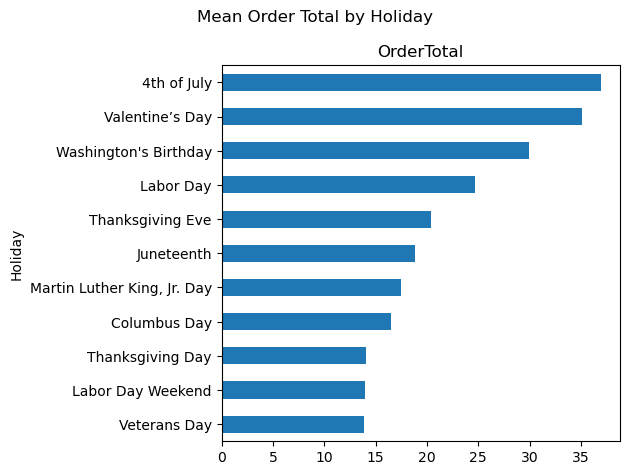

In [61]:
merged.groupby(['Holiday'])['OrderTotal'].mean().sort_values().plot.barh(subplots=True, title="Mean Order Total by Holiday")

plt.tight_layout()
plt.show()

Identifying which holiday has the highest revenue: 

In [62]:
merged.groupby(['Holiday'])['OrderTotal'].sum().sort_values(ascending=False)

Holiday
Thanksgiving Eve               13587.13
Columbus Day                    9055.99
Veterans Day                    7040.04
Thanksgiving Day                6810.98
4th of July                     6797.80
Labor Day                       6780.43
Washington's Birthday           5843.19
Valentine’s Day                 4980.59
Juneteenth                      4444.67
Labor Day Weekend               3663.09
Martin Luther King, Jr. Day     3342.42
Name: OrderTotal, dtype: float64

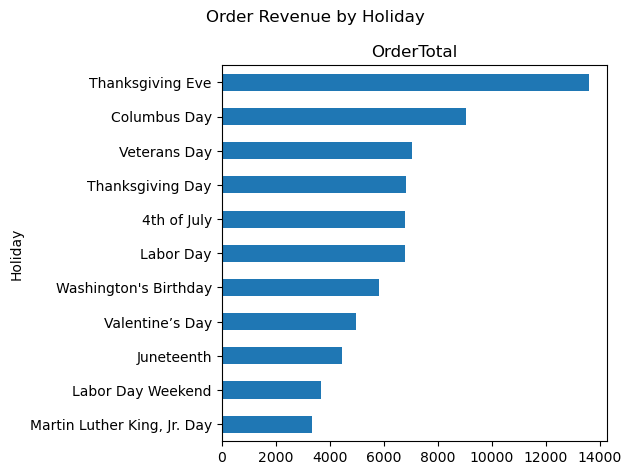

In [64]:
merged.groupby(['Holiday'])['OrderTotal'].sum().sort_values().plot.barh(subplots=True, title="Order Revenue by Holiday")

plt.tight_layout()
plt.show()

# 5. Interpret Results <a id='interpret'></a>

The holiday with the highest revenue is **Thanksgiving Eve**. 

The holidays with the largest mean orders values are: 
- 4th of July:  \$36.94
- Valentines Day: \$35.07

These two holidays have nearly the same mean order total. 